<a href="https://colab.research.google.com/github/aquemi/simulations_in_economics/blob/main/Simula%C3%A7%C3%B5es_Econ%C3%B4micas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input File Columns

● initial_age: the age the person had when this the simulation started

● weight: How many persons of the population this head of household
represent

● income: The annual gross income of the individual.

● family_kind: 1 = Husband-Wife, 2 = Male-Led, 3 = Female-Led

● race: 1= White, 2 = Black, 3 = Hispanic, 4 = Other

● marital_status : 1 = Married, 2 = Widowed, 3 = Divorced, 4 = Separated, 5 =
Never married

● annual_contribution (as % of income): What % of the current income the
individuals contribute to retirement accounts

● accumulated_capital: At this person’s death, the resulting balance
considering all its incomes and expenses, in 2020 US dollars. If it is greater
than or equal zero, it means this person was able to afford his retirement, if
it is lower than zero, it means

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Import useful libraries: pandas and numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/saving/data.csv')

In [4]:
data.head(2)

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02
1,1,45,591,1,1,1,161474.307306,0.24,248327.61


In [5]:
data.dtypes

Unnamed: 0               int64
initial_age              int64
weight                   int64
family_kind              int64
race                     int64
marital_status           int64
accumulated_capital    float64
annual_contribution    float64
income                 float64
dtype: object

In [7]:
data['annual_contribution_us'] = data['income']*data['annual_contribution']
data['time_contribution'] = 65 - data['initial_age']

In [8]:
data.head(2)

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_contribution,annual_contribution_us
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,9811.3446
1,1,45,591,1,1,1,161474.307306,0.24,248327.61,20,59598.6264


#### In order to determine the savings match for each line in the table, let's consider the Retirement Savings Contributions Credit (2020) from IRS, an official website of the United States Government.

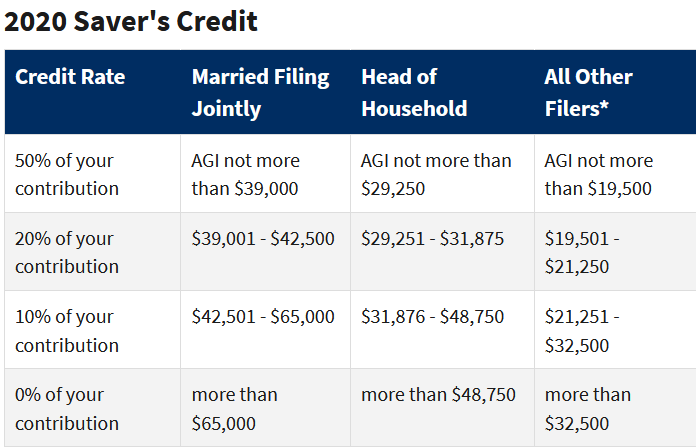

In [9]:
for index, row in data.iterrows():
  if row.family_kind != 1:
    if row.income <= 29250:
      data.loc[index, 'savings_match'] = 0.5*row.annual_contribution_us
    elif row.income >= 29251 and row.income <= 31875:
      data.loc[index, 'savings_match'] = 0.2*row.annual_contribution_us
    elif row.income >= 31876 and row.income <= 48750:
      data.loc[index, 'savings_match'] = 0.1*row.annual_contribution_us
    else:
      data.loc[index, 'savings_match'] = 0
  else:
    if row.income <= 39000:
      data.loc[index, 'savings_match'] = 0.5*row.annual_contribution_us
    elif row.income >= 39001 and row.income <= 42500:
      data.loc[index, 'savings_match'] = 0.2*row.annual_contribution_us
    elif row.income >= 42501 and row.income <= 65000:
      data.loc[index, 'savings_match'] = 0.1*row.annual_contribution_us
    else:
      data.loc[index, 'savings_match'] = 0

In [10]:
for index, row in data.iterrows():
  if row.savings_match > 5000:
      data.loc[index, 'savings_match'] = 5000

In [11]:
data.head(3)

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_contribution,annual_contribution_us,savings_match
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,9811.3446,981.13446
1,1,45,591,1,1,1,161474.307306,0.24,248327.61,20,59598.6264,0.00000
2,2,59,613,1,1,1,14209.331170,0.09,24371.94,6,2193.4746,1096.73730


Considering the inflation equal to 0.044 per year, let's calculate the new capital according to the following funtion *lambda_valor*:

In [12]:
def lambda_valor(row):
  inflacao = 0.044
  cap_f = row['accumulated_capital']/(1+inflacao)
  for i in range( int(row['time_contribution'])+1):
    cap_f = cap_f*(1+inflacao) + (row['annual_contribution_us'] + row['savings_match'])*(1+inflacao)**i

  return cap_f

In [13]:
data['new_accumulated_capital'] = data.apply(lambda row: lambda_valor(row), axis=1)

In [14]:
data.head(3)

,Unnamed: 0,initial_age,weight,family_kind,race,marital_status,accumulated_capital,annual_contribution,income,time_contribution,annual_contribution_us,savings_match,new_accumulated_capital
0,0,57,616,2,1,3,-153263.200759,0.23,42658.02,8,9811.3446,981.13446,-7.921472e+04
1,1,45,591,1,1,1,161474.307306,0.24,248327.61,20,59598.6264,0.00000,3.343229e+06
2,2,59,613,1,1,1,14209.331170,0.09,24371.94,6,2193.4746,1096.73730,4.821944e+04


In [16]:
data.to_csv('/content/drive/MyDrive/Colab Notebooks/saving/new_scenario.csv')

### 2) Plot the Weighted Average Retirement Savings Shortfall by Race and Age Cohort.
Age Cohorts defined as the following intervals: [35,39), [40,44), 45,49), [50,54), [55,59),[60,64)

The Retirement Savings Shortfall is defined as:
> Sum of the accumulate of all the persons who had deficits / Total
number of persons





Defining the age interval:
> Name: initial_age, Length: 47626, dtype: category

Categories (6, interval[int64, left]): [[35, 39) < [39, 44) < [44, 50) < [50, 54) < [54, 60) < [60, 64)]

In [20]:
age = pd.cut(data['initial_age'], bins=[35, 39, 44, 50, 54, 60, 64], right=False)
data['age_interval'] = age


In [22]:
#persons who had deficits
data['weight_shortfall_capital'] = np.where(data['accumulated_capital'] < 0, data['weight'], 0)
data['weight_shortfall_new_capital'] = np.where(data['new_accumulated_capital'] < 0, data['weight'], 0)

#persons who were able to afford its retirement
data['weight_readness_capital'] = np.where(data['accumulated_capital'] > 0, data['weight'], 0)
data['weight_readness_new_capital'] = np.where(data['new_accumulated_capital'] > 0, data['weight'], 0)

In [23]:
df = data.groupby(['race', 'age_interval'])['weight', 'weight_shortfall_capital', 'weight_shortfall_new_capital', 'weight_readness_capital', 'weight_readness_new_capital'].sum()

<ipython-input-23-e9ed7cb4ae71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(['race', 'age_interval'])['weight', 'weight_shortfall_capital', 'weight_shortfall_new_capital', 'weight_readness_capital', 'weight_readness_new_capital'].sum()


In [30]:
retirement_savings_shortfall =pd.to_numeric(df['weight_shortfall_new_capital'])/pd.to_numeric(df['weight'])

● race: 1= White, 2 = Black, 3 = Hispanic, 4 = Other

<Axes: xlabel='age_interval'>

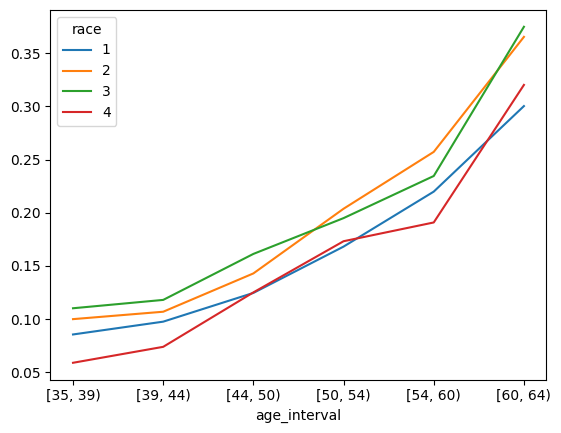

In [36]:
plot_df = retirement_savings_shortfall.unstack('race')
plot_df.plot()

When observing the graph, it becomes evident that the retirement deficit increases as individuals age, and between the ages of 35 and 50, it is higher among individuals of Hispanic ethnicity.

#### 3) Impact in percentage points of the new scenario into the Retirement Readiness Rating, per Age Cohort.

The Retirement Readiness Rating is defined as:
> Number of persons who were able to afford its retirement / Total
number of persons

In [26]:
retirement_readiness_rating = pd.to_numeric(df['weight_readness_new_capital'])/pd.to_numeric(df['weight']) - pd.to_numeric(df['weight_readness_capital'])/pd.to_numeric(df['weight'])

● race: 1= White, 2 = Black, 3 = Hispanic, 4 = Other

<Axes: xlabel='age_interval'>

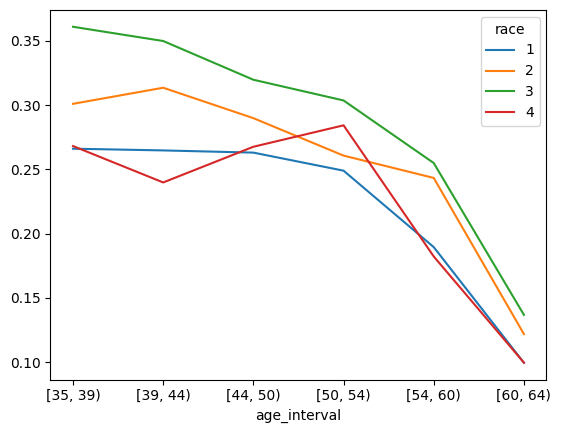

In [27]:
plot_df = retirement_readiness_rating.unstack('race')
plot_df.plot()

Upon examining the graph, it is evident that in the new scenario, there would be an increase in the number of people retiring, approximately 30 to 35%, among individuals of Hispanic and African-American ethnicity who are between the ages of 35 and 44. Conversely, individuals of white and other ethnicities would experience a lesser impact.